In [ ]:
!pip install qiskit
!pip install matplotlib
!pip install pylatexenc

In [2]:
import qiskit

In [3]:
print(qiskit.__version__)

2.1.0


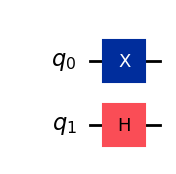

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.x(0)
qc.h(1)

qc.draw('mpl')

In [5]:
from qiskit import quantum_info as qi

psi_1 = qi.Statevector(qc)

psi_1.draw('latex')

<IPython.core.display.Latex object>

In [6]:
psi_0=qi.Statevector([0,0,0,1])
psi_0.draw('latex')

<IPython.core.display.Latex object>

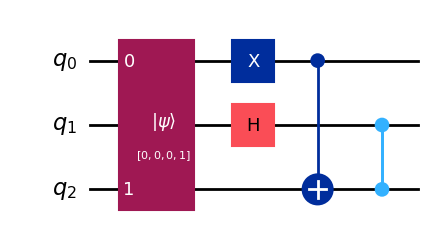

In [7]:
from qiskit import QuantumCircuit

qc2 = QuantumCircuit(3)

qc2.initialize(psi_0,[0,2])

qc2.draw('mpl')

qc2.x(0)
qc2.h(1)
qc2.cx(0,2)
qc2.cz(1,2)

qc2.draw('mpl')

In [8]:
psi_1 = qi.Statevector(qc2)

psi_1.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
!pip install qiskit-aer

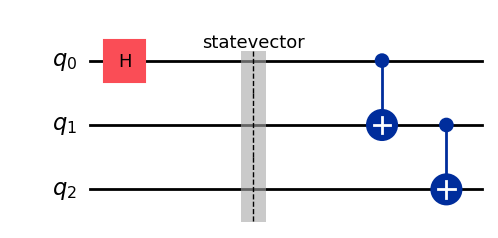

In [21]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

ghz = QuantumCircuit(3)

ghz.h(0)
ghz.save_statevector()
ghz.cx(0,1)

ghz.cx(1,2)


ghz.draw('mpl')


In [22]:
from qiskit import transpile
from qiskit_aer import AerSimulator

sim_aer = AerSimulator()

ghz_aer = transpile(ghz, sim_aer)

result = sim_aer.run(ghz_aer).result()

psi_somewhere = result.get_statevector()

psi_somewhere.draw('latex')



<IPython.core.display.Latex object>

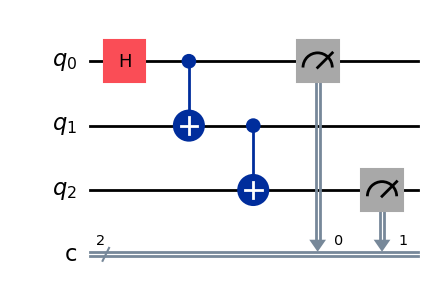

In [23]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

ghz = QuantumCircuit(3,2)

ghz.h(0)

ghz.cx(0,1)

ghz.cx(1,2)
ghz.measure(0,0)
ghz.measure(2,1)

ghz.draw('mpl')

In [ ]:
!pip install qiskit_ibm_runtime

In [17]:
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

sim_aer = AerSimulator()

ghz_aer = transpile(ghz, sim_aer)

sampler = SamplerV2(mode = sim_aer)

# this is called PUB

job_aer = sampler.run([(ghz_aer,None,1000), (ghz_aer,None,2000)])



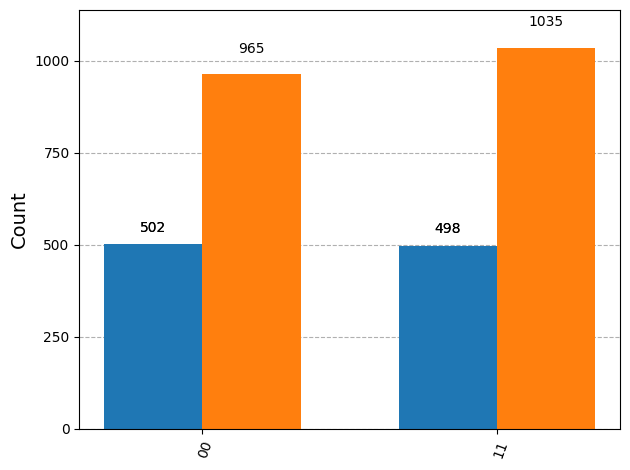

In [18]:
results_aer = job_aer.result()

counts_1000 = results_aer[0].data.c.get_counts()
counts_2000 = results_aer[1].data.c.get_counts()

from qiskit.visualization import plot_histogram

plot_histogram([counts_1000, counts_2000])

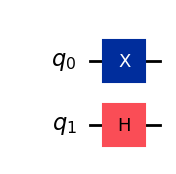

In [25]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
psi_0 = qi.Statevector(qc)
qc.x(0)
qc.h(1)

qc.draw('mpl')

In [26]:

from qiskit import quantum_info as qi

psi_1 = qi.Statevector(qc)

psi_0.draw('latex')

<IPython.core.display.Latex object>

In [27]:

psi_1.draw('latex')

<IPython.core.display.Latex object>

In [28]:
from IPython.display import display

output1 = psi_0.draw('latex')
output2 = psi_1.draw('latex')

display(output1,output2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

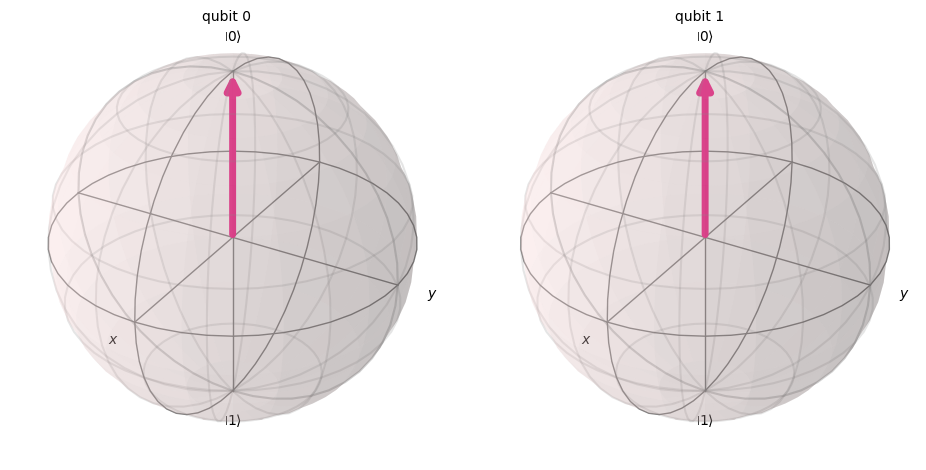

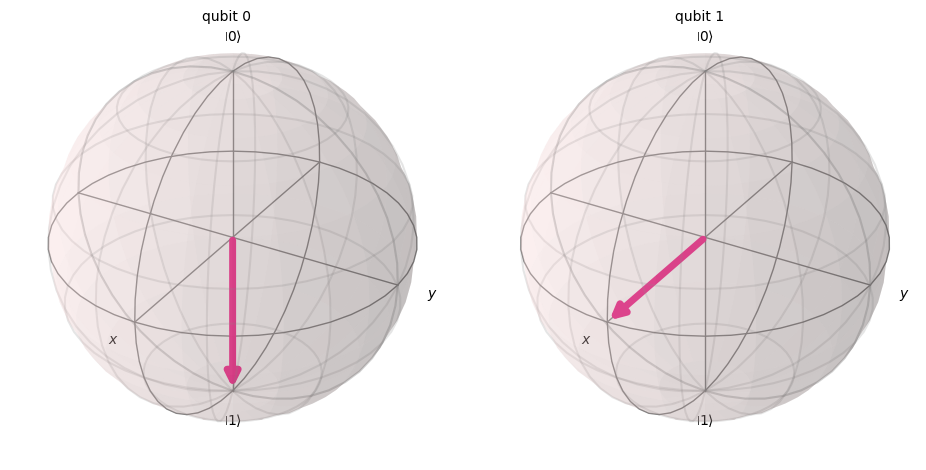

In [29]:
from IPython.display import display

output1 = psi_0.draw('bloch')
output2 = psi_1.draw('bloch')

display(output1,output2)

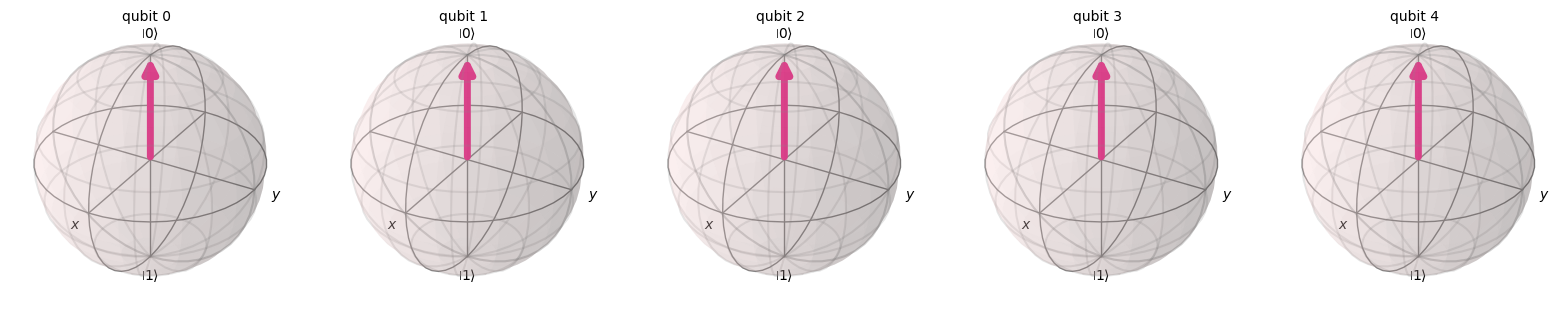

In [30]:
qc = QuantumCircuit(5)
qi.Statevector(qc).draw('bloch')

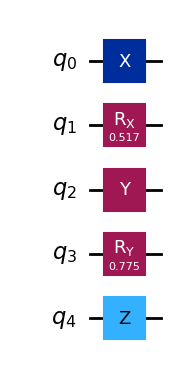

In [31]:

qc = QuantumCircuit(5)

qc.x(0)
qc.rx(30*3.1/180,1)
qc.y(2)
qc.ry(45*3.1/180,3)
qc.z(4)
qc.draw('mpl')

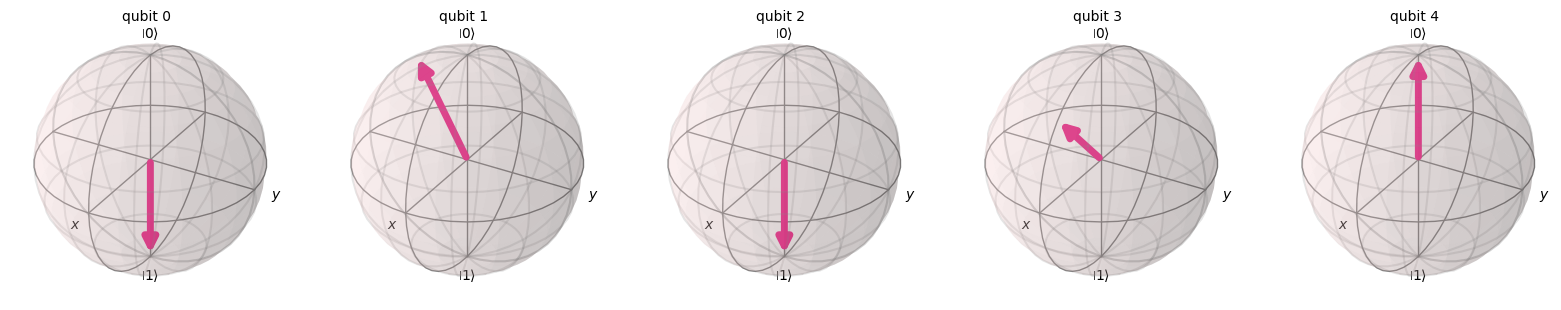

In [32]:

qi.Statevector(qc).draw('bloch')